<a href="https://colab.research.google.com/github/Biokatzen/Hepatitis-C-Prediction-Dataset/blob/main/HepatitisC_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hepatitis C Prediction Dataset

The dataset used in this study contains data from female and male blood donors and patients suffering from hepatitis C, fibrosis and cirrhosis with ages ranged from 19 to 77. These are the categorical variables that will be used for classification and clustering later on. The numerical variables are the following: ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT, which are traditional diagnostic tests for liver diseases.

The table below resumes all the attributes found in this dataset:


| **Attribute** | **Value** | **Value Label** | **Type** | **Description** |
|----------------|----------------|-----------------|-----------|-----------------|
| **Patient ID/No.** | Numeric | – | Integer | Patient identification |
| **Category** | 0 | Blood Donor | Categorical | Diagnosis of the patient. Blood donor vs Hepatitis C including its progress to Fibrosis and Cirrhosis |
|  | 0s | Suspect Blood Donor |  |  |
|  | 1 | Hepatitis |  |  |
|  | 2 | Fibrosis |  |  |
|  | 3 | Cirrhosis |  |  |
| **Age** | Numeric | – | Integer |  |
| **Sex** | f | Female | Binary |  |
|  | m | Male |  |  |
| **ALB** | Numeric | – | Continuous | Albumin Blood Test (g/L)|
| **ALP** | Numeric | – | Continuous | Alkaline Phosphatase (U/L) |
| **ALT** | Numeric | – | Continuous | Alanine Transaminase (U/L) |
| **AST** | Numeric | – | Continuous | Aspartate Transaminase (U/L)|
| **BIL** | Numeric | – | Continuous | Bilirubin (µmol/L) |
| **CHE** | Numeric | – | Continuous | Acetylcholinesterase (U/mL)|
| **CHOL** | Numeric | – | Continuous | Cholesterol (mmol/L) |
| **CREA** | Numeric | – | Continuous | Creatinine (µmol/L) |
| **GGT** | Numeric | – | Continuous | Gamma-Glutamyl Transferase (U/L) |
| **PROT** | Numeric | – | Continuous | Total Protein (g/L)|


In [185]:
import pandas as pd
import os

Firstly, the dataset is loaded into google colab  enviroment and printed to have a first look. As we can see below, the dataset has 615 rows and 14 columns

In [186]:
location = '/content/drive/MyDrive/Colab Notebooks'
os.chdir(location)
df = pd.read_csv('HepatitisCdata.csv', header=0, sep=';')
df.shape
print(df)

     Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.1

As seen in the dataset, the first column corresponds to the patiend ID, which is not very informative, so it can get deleted


In [187]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df)

          Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...    ...    ...   ...    ...   ...   
610    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66  3.63   
613    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   3.56  4.20   
614    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0   15.6  76.5

An important pre-processing step is handle the NA values. Firstly the NA values are counted by column to have an idea of how many are they.

In [188]:
df.isna().sum()


,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10


As we can see above, the columns with the most NA values are CHOL and ALP with 10 and 18 NA values respectively. But as the dataset has 615 rows, removing these rows won't make a big impact in the model.
Additionally the Sex and Category variables, as they are categorical, they should be changed to binary in order to perform linear regression. The Category variable has ordinal data so it is better to use the Label Encoding method whereas the Sex variable should be encoded using One-Hot Encoding as it does not have any ordinal data

In [189]:
from sklearn.preprocessing import LabelEncoder
df_without_na = df.dropna()


#One-Hot Encoding
df_encoded = pd.get_dummies(df_without_na, columns=["Sex"], drop_first=True, dtype=int)

#Label Encoding
encoder = LabelEncoder()
df_encoded["Category"] = encoder.fit_transform(df_encoded["Category"])

print(df_encoded)

df_encoded.describe()

     Category  Age   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0           0   32  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1           0   32  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2           0   32  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3           0   32  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4           0   32  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..        ...  ...   ...    ...   ...    ...   ...    ...   ...    ...    ...   
608         4   58  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   49.7   
609         4   59  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1  101.1   
610         4   62  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611         4   64  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612         4   64  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   64.2   

     PROT  Sex_m  
0    69.

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_m
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.303905,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153,0.616299
std,0.944552,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883,0.486700
min,0.000000,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.000000
25%,0.000000,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000,0.000000
50%,0.000000,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000,1.000000
75%,0.000000,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000,1.000000
max,4.000000,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000,1.000000


Once the NA values have been eliminated and the categorical columns have been encoded as binary values, we can have a look to the matrix of correlations to see if there is any interesting correlation between numerical variables that is worth to investigate through linear regression

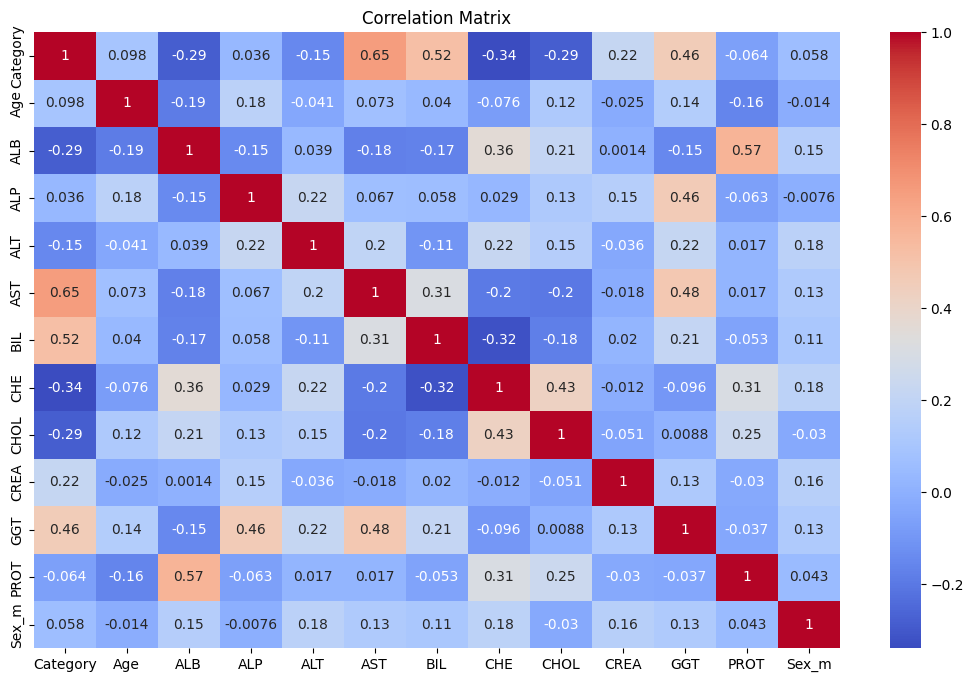

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


From the correlations matrix we can observe how the biggest correlations, either positive or negative, are associated with the Category variable, meaning they are associated with the state of disease (Healthy, Hepatitis, Fibrosis, Cirrhosis). As AST has a strong correlation with the category of disease, it would be interesting to investigate if it can be predicted from the rest of the laboratory parameters. It has a moderate positive correlation with GGT, so it would be interesting to compare how the Llinear regression model works using all the continuous variables as features versus just the GGT variable.

First step into the regression model is to check and remove outliers but doing this in all the dataset could produce data leackage, so before that we need to divide the dataset into train and test datasets.
In order to divide the dataset we need to know which variable is our target. As described above, we would like to predict AST, so we need to exclude AST from the training of features.

# Regression

In [191]:

from sklearn.model_selection import train_test_split

#Features (X) and target (y)
X = df_encoded.drop('ALT', axis=1)
y = df_encoded["ALT"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Once we have the dataset divided, we can check outliers calculating z scores in the training set and removing the ones that are too far away from the average value (3 standard deviations is the typical threshold)

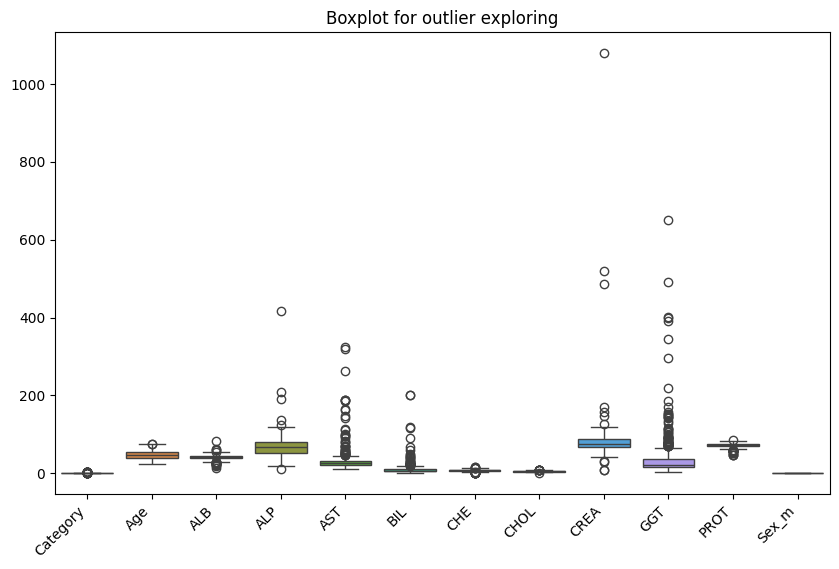

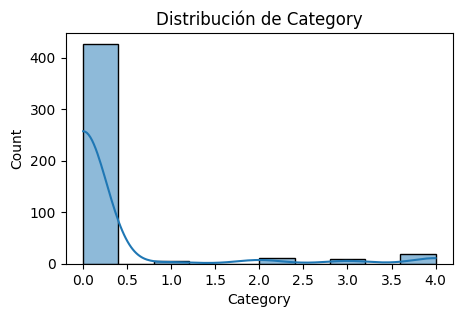

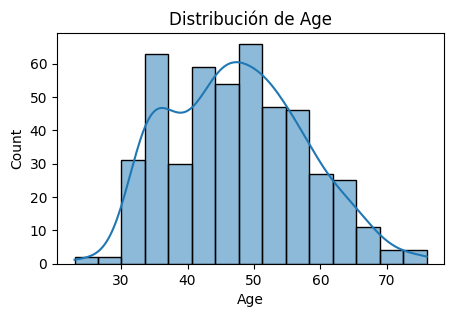

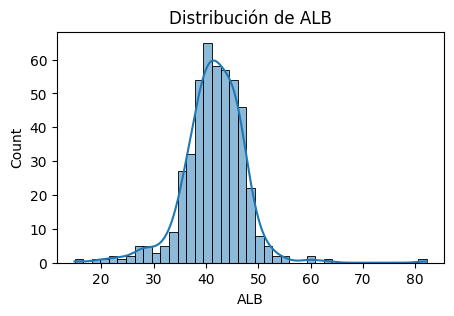

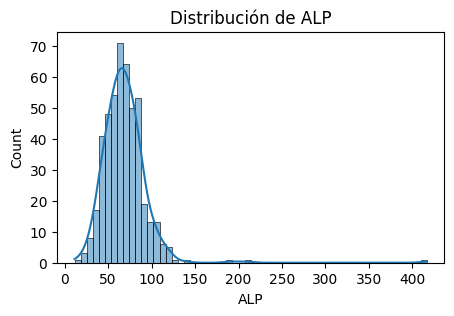

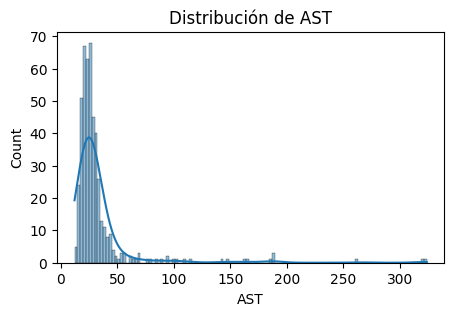

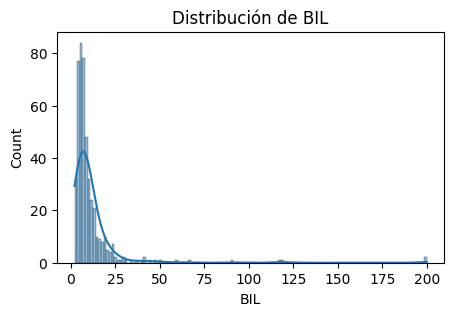

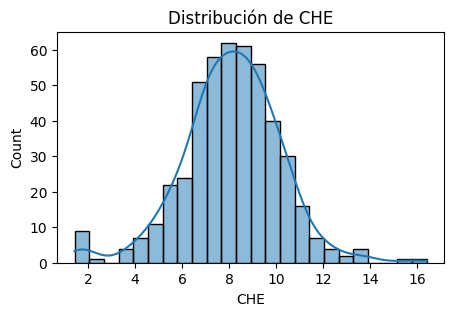

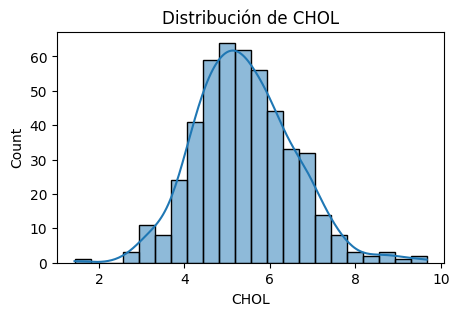

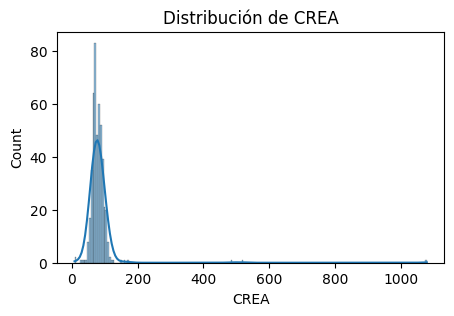

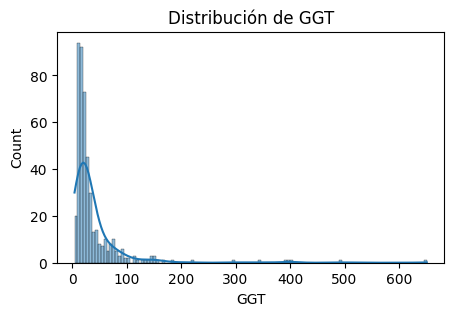

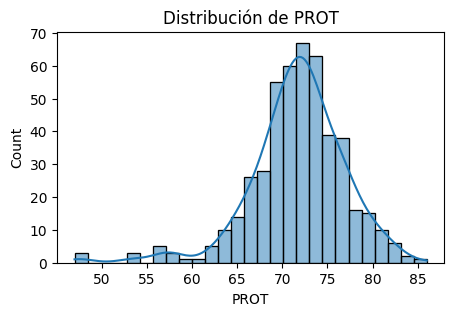

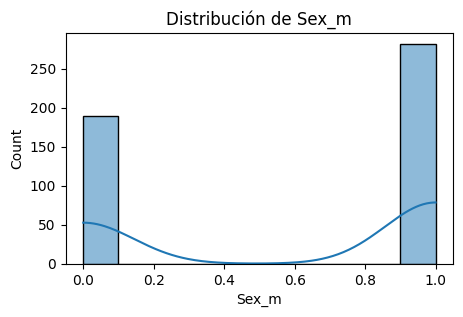

     Category  Age   ALB   ALP   AST   BIL    CHE  CHOL   CREA   GGT  PROT  \
132         0   44  35.5  81.7  29.5   6.4   8.81  6.65   83.0  24.1  68.0   
154         0   46  49.1  60.0  20.5   3.1   7.81  5.02  102.0  20.8  70.2   
77          0   38  48.4  44.9  22.1   7.9  10.53  7.51   87.0  43.2  82.6   
444         0   49  45.4  45.9  15.9   5.8   9.05  6.81   69.0  14.5  78.2   
256         0   56  40.2  37.1  25.1  10.2   9.69  4.93  103.0  20.7  71.9   
..        ...  ...   ...   ...   ...   ...    ...   ...    ...   ...   ...   
71          0   38  39.9  62.9  43.9  10.4  10.90  7.01   99.0  88.3  73.1   
106         0   41  44.7  74.9  20.2   6.3  10.34  4.23   74.0  23.7  72.1   
271         0   59  38.4  61.2  27.2   3.0   6.88  6.89   91.0  14.0  64.5   
441         0   49  39.3  59.4  15.0   4.8   8.03  4.58   83.0  12.5  74.3   
102         0   41  42.3  55.9  18.9  10.9   7.15  3.29   86.0  24.5  76.1   

     Sex_m  
132      1  
154      1  
77       1  
444      0 

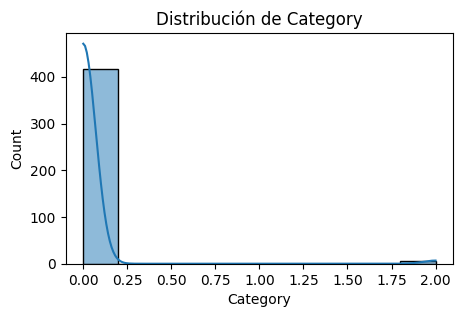

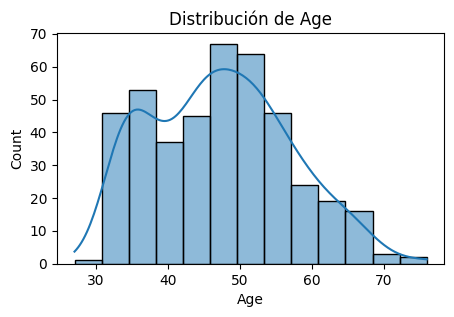

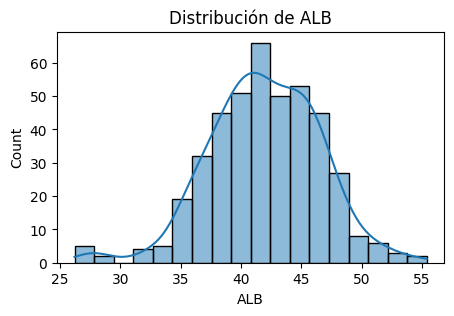

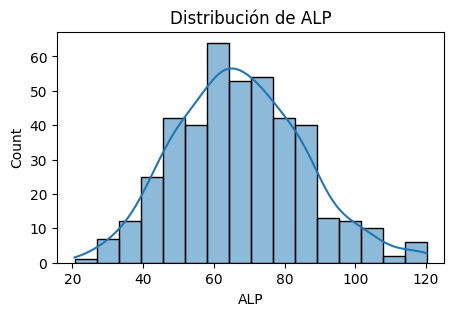

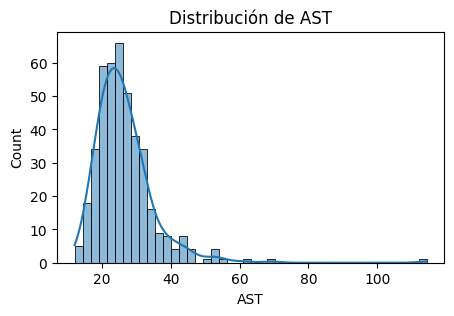

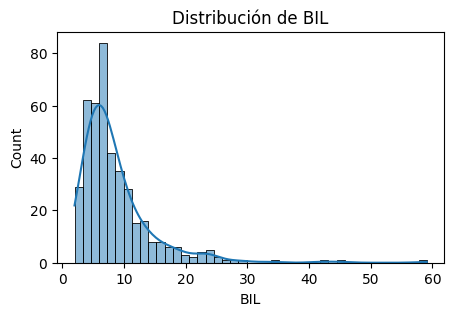

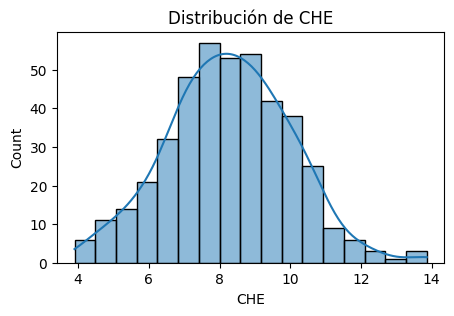

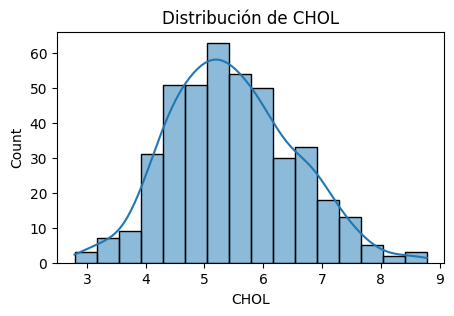

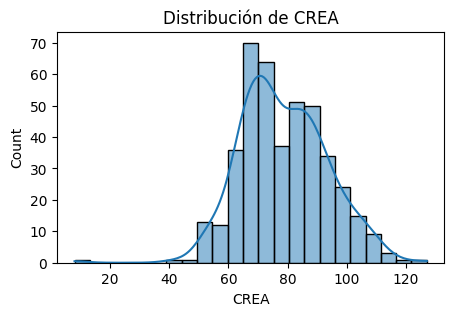

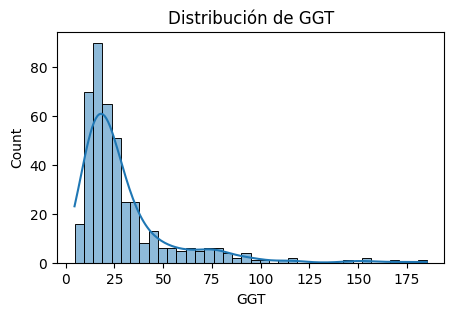

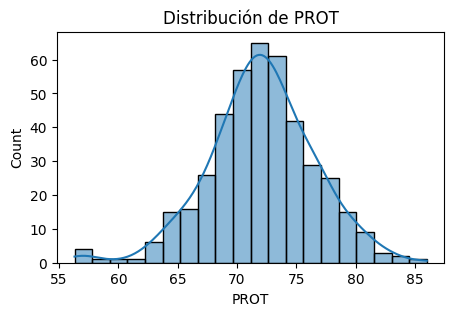

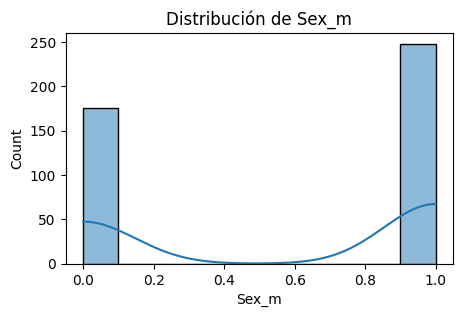

In [192]:
import numpy as np
from scipy.stats import zscore

#Boxplot for exploring outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot for outlier exploring")
plt.show()

#Distribution of data of each variable before removing outliers
for col in X_train.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

#Calculate z scores
z_scores = np.abs(zscore(X_train))

# Define threshold
threshold = 3

# Only rows without outliers
mask_train = (z_scores < threshold).all(axis=1)
X_train_clean = X_train[mask_train]
y_train_clean = y_train[mask_train]

print(X_train_clean)

for col in X_train_clean.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(X_train_clean[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()


Checking the first boxplot we can observe very obvious outliers that must be removed. Also the distribution of data of each variable has been ploted to check if there is any skewed or weird distribution that must be considered.
After checking the plots, the outliers have been removed calculating the z score and remove the rows with a z score higher than 3.
After outlier removal, the distributions of each variable have been ploted and even though there are some variables that have a normal distribution, some others have a skewed distribution, like ALT. For this reason we decided to use RobustScaler as the method to scale data prior to Linear Regression.

As ALT have a skewed distribution and a normal distribution is required for Linear Regression, probably this method is not a good predictor for ALT.

In [193]:
print(f'Original dataset: {df_encoded.shape[0]}')
print(f"Rows after eliminating outliers: {X_train_clean.shape[0]}")
print(f"Outliers removed: {X_train.shape[0] - X_train_clean.shape[0]}")


Original dataset: 589
Rows after eliminating outliers: 423
Outliers removed: 48


Above is displayed the amount of outliers removed in the dataset, which is 48

In [194]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

In [195]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train_clean)

print(f"Model Intercept (theta_0): {model.intercept_}")
print(f"Model Coefficient (theta_1): {model.coef_}")

Model Intercept (theta_0): 25.355019531890918
Model Coefficient (theta_1): [-20.29335822  -3.06876669   0.23909309   1.16684811   8.19014146
   0.3710211    2.14965049   0.56823233   1.17415337   2.5041388
  -0.93310086   2.31897639]


In [196]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 644.11
R-squared: -0.34


The model has a high error and a negative r-squared meaning that the model is worse than calculating the average of y. Most likely as we have skewed variables, a linear regression is not the best model to predict the target.
Would be wise to use logaritmic scale in our data and do again linear regression to see if the r score improves.

In [197]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X_train_log = np.log1p(X_train_clean)
X_test_log  = np.log1p(X_test)
y_train_log = np.log1p(y_train_clean)
y_test_log  = np.log1p(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled  = scaler.transform(X_test_log)

model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

# Predict and revert log
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # inverse of log1p

# Evaluate metrics in the original scale
from sklearn.metrics import r2_score, mean_squared_error
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2: 0.48592902056459153
MSE: 247.18167498994274


As seen above, the mean squared error is much better as well as the r score, so the model can somehow predict ALT values using the rest of features but still not performing as good as it should be.

In order to try to improve the model, regularization through Ridge is done to prevent overfitting the model. The reason to select Ridge instead of Lasso is because most of the features are predictive and Ridge allows to balance them.

In [198]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_log)

y_pred_ridge = ridge_model.predict(X_test_scaled)

print("R2:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))

R2: -1.0886818493605732
MSE: 1004.304655775472


Applying Ridge the MSE and r score are way worse than before, so it would be interesting to apply Lasso to see if we can get better metrics

In [199]:
from sklearn.linear_model import Lasso

ridge_model = Lasso(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_log)

y_pred_lasso = ridge_model.predict(X_test_scaled)

print("R2:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))

R2: -1.1170848343190216
MSE: 1017.9617141926853


As seen above, metrics are also way worse than before applying regularization, so it is sure than the model is not overfitted.

In [200]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline


model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])
model.fit(X_train, y_train)

print("R2:", r2)
print("MSE:", mse)

R2: -0.3395813239955363
MSE: 644.1133008794287


Applying polynomial features does not improve the model either so the last step before discarding linear regression would be GridSearchCv

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train_clean, y_train_clean)

print(grid.best_params_)
print(grid.best_score_)


{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
0.5281717660375931


Grid results show a r score of 0.53 which is slightly higher than the r scored obtained after logarithmic transformation meaning that our model has already the right parameters. So the reason of this moderate r-score instead of a high r-score could be in the limitations of the data, the linear regression can only capture aproximately the 50% of the variability and the model has been optimized at its maximum, so as said before, this is not a suitable model for this dataset.

# Classification